In [ ]:
# https://drive.google.com/

In [ ]:
# @title ##**check gpu if 0 mean enable** { display-mode: "form" }

%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from IPython.display import clear_output
!pip install easyocr
!pip3 install python-docx
clear_output()

In [ ]:
import easyocr
import PIL
from PIL import ImageDraw
reader = easyocr.Reader(['en'])

In [ ]:
from google.colab import drive
from IPython.display import clear_output
import os
storage="google drive"#@param["temporary","google drive"]
if storage=="google drive":
  drive.mount('/content/gdrive')
  os.chdir("/content/gdrive/MyDrive/")
  clear_output()
  print("Using drive as a storage")
elif storage=="temporary":
  os.chdir("/content/")
  print("Using colab as a temporary storage")

Using drive as a storage


In [ ]:
# @title ##**Import** { display-mode: "form" }

import cv2
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow
import glob
from PIL import Image
import PIL
from PIL import ImageDraw
try:
  os.mkdir("text_extract")
except:
  pass  
%cd ./text_extract


/content/gdrive/My Drive/text_extract


In [ ]:
from google.colab import files
import requests
upload_type="Download a Image" #@param["Upload a image","Download a Image"]
if upload_type=="Upload a image": 
  uploaded = files.upload()
elif upload_type=="Download a Image" :
  download_link=input("Enter your image link : " )
  r = requests.get(download_link) 
  file_name="image.jpg"
  with open(file_name,'wb') as f: 
    f.write(r.content) 

Enter your image link : https://5.imimg.com/data5/EO/EW/MY-10706218/staff-id-card-500x500.jpg


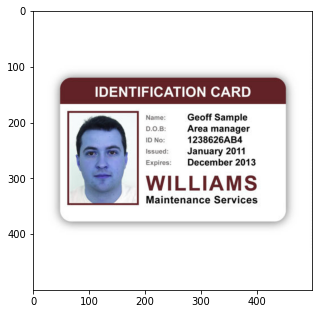

In [ ]:
# @title ##**Enter a image path to display the image** { display-mode: "form" }

enter_image_path= "/content/gdrive/MyDrive/text_extract/image.jpg"#@param {type:"string"}
image=cv2.imread(enter_image_path)
plt.figure(figsize=(5,12))
plt.imshow(image)

In [ ]:
# https://www.image-map.net/
# x1,y1
# * 
#          *
#          x2,y2


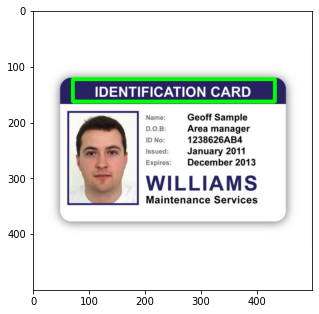

In [ ]:
# @title ##**Enter a image path to know which path we will crop, also add the co-ordinate** { display-mode: "form" }

# https://www.image-map.net/
enter_image_path= "/content/gdrive/MyDrive/text_extract/image.jpg"#@param {type:"string"}
coordinate="71,123,433,163"#@param {type:"string"}
co=coordinate.split(",")
x1=int(co[0])
y1=int(co[1])
x2=int(co[2])
y2=int(co[3])
image = cv2.imread(enter_image_path)
fixed_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# (x3,y3) then (x1,y1)
new_img = cv2.rectangle(fixed_image, (x2,y2), (x1,y1), (0, 255, 0), 5) 

plt.figure(figsize=(5,12))
plt.imshow(new_img)

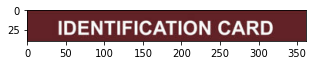

In [ ]:
# @title ##**For croping image enter the four co-ordinate** { display-mode: "form" }


!rm -rf "./cropped_image"
folders=["cropped_image"]
for i in folders:
  try:
    os.mkdir(i)
  except:
    pass

enter_image_path= "/content/gdrive/MyDrive/text_extract/image.jpg"#@param {type:"string"}
coordinate="71,123,433,163"#@param {type:"string"}
co=coordinate.split(",")
x1=int(co[0])
y1=int(co[1])
x2=int(co[2])
y2=int(co[3])
image=cv2.imread(enter_image_path)
cropped=image[y1:y2,x1:x2]
# (height,width)
filename=f'cropped_image/{enter_image_path.split("/")[-1]}'
cv2.imwrite(filename, cropped)
plt.figure(figsize=(5,12))
plt.imshow(cropped)


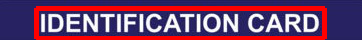

In [ ]:
# @title ##**Enter a image path extract text and  display the image** { display-mode: "form" }

enter_image_path_for_text= "/content/gdrive/MyDrive/text_extract/cropped_image/image.jpg"#@param {type:"string"}
im = PIL.Image.open(enter_image_path_for_text)
bounds = reader.readtext(enter_image_path_for_text)
# bounds
# Draw bounding boxes
def draw_boxes(image, bounds, color='red', width=5):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [ ]:
# @title ##**Extracted text** { display-mode: "form" }

question=" "
for i in bounds:
    question+=" "+  i[-2]
    # print(i[-2])
print("\n")  
question

'  IDENTIFICATION CARD'

In [ ]:
# @title ##**Create .docx file** { display-mode: "form" }
import docx 
doc = docx.Document() 
doc.add_paragraph(question) 
doc.save('./demo.docx') 
